In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors import MoleculeDescriptors
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Publication-quality plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
IPythonConsole.ipython_useSVG = True

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
def load_and_validate_data(file_path):
    """
    Load SMILES file and validate chemical structures
    """
    print(f"Loading data from {file_path}...")
    
    # Load the SMILES file
    try:
        df = pd.read_csv(file_path, sep='\s+', header=None, 
                        names=['smiles', 'cas', 'activity'])
        print(f"Raw dataset loaded: {df.shape[0]} compounds")
    except Exception as e:
        print(f"Error loading file: {e}")
        # Create a demo dataset if file not found
        print("Creating demo dataset for demonstration purposes...")
        demo_data = {
            'smiles': ['CC(=O)OC1=CC=CC=C1C(=O)O', 'C1=CC=C(C=C1)C=O', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
                      'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', 'C1CCCCC1'],
            'cas': ['50-78-2', '100-52-7', '58-08-2', '50-78-3', '110-82-7'],
            'activity': [0, 1, 1, 0, 0]
        }
        df = pd.DataFrame(demo_data)
    
    # Show initial statistics
    print(f"\nDataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Check class balance
    print(f"\nClass distribution:")
    print(df['activity'].value_counts())
    print(f"Mutagenic rate: {df['activity'].mean():.2%}")
    
    # Validate SMILES using RDKit
    print("\nValidating SMILES...")
    df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(str(x)))
    
    # Identify invalid molecules
    invalid_mask = df['mol'].isnull()
    n_invalid = invalid_mask.sum()
    
    if n_invalid > 0:
        print(f"WARNING: {n_invalid} invalid SMILES found:")
        print(df.loc[invalid_mask, ['smiles', 'cas']].head())
        df = df[~invalid_mask].copy()
        print(f"Removed {n_invalid} invalid molecules")
    
    # Check for duplicates
    df['canonical_smiles'] = df['mol'].apply(Chem.MolToSmiles)
    n_duplicates = df.duplicated(subset=['canonical_smiles']).sum()
    if n_duplicates > 0:
        print(f"Found {n_duplicates} duplicate molecules. Removing duplicates...")
        df = df.drop_duplicates(subset=['canonical_smiles'])
    
    # Final dataset statistics
    print(f"\nFinal dataset: {df.shape[0]} valid, unique molecules")
    print(f"Final class distribution:")
    print(df['activity'].value_counts())
    print(f"Final mutagenic rate: {df['activity'].mean():.2%}")
    
    return df

# Load the dataset
df = load_and_validate_data('smiles_cas_N6512.smi')

# Display sample molecules
print("\nSample molecules from dataset:")
PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'Molecule')
display(df[['Molecule', 'cas', 'activity']].head(6))

Loading data from smiles_cas_N6512.smi...
Raw dataset loaded: 6512 compounds

Dataset shape: (6512, 3)
Columns: ['smiles', 'cas', 'activity']

Class distribution:
activity
1    3503
0    3009
Name: count, dtype: int64
Mutagenic rate: 53.79%

Validating SMILES...


[18:17:16] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[18:17:16] SMILES Parse Error: check for mistakes around position 20:
[18:17:16] NNC(=O)CNC(=O)\C=N\#N
[18:17:16] ~~~~~~~~~~~~~~~~~~~~^
[18:17:16] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[18:17:16] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[18:17:16] SMILES Parse Error: check for mistakes around position 17:
[18:17:16] O=C1NC(=O)\C(=N/#N)\C=N1
[18:17:16] ~~~~~~~~~~~~~~~~^
[18:17:16] SMILES Parse Error: extra open parentheses while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[18:17:16] SMILES Parse Error: check for mistakes around position 13:
[18:17:16] O=C1NC(=O)\C(=N/#N)\C=N1
[18:17:16] ~~~~~~~~~~~~^
[18:17:16] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[18:17:16] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[18:17:16] SMILES Parse Error

                                   smiles          cas
1                   NNC(=O)CNC(=O)\C=N\#N     820-75-7
2                O=C1NC(=O)\C(=N/#N)\C=N1    2435-76-9
3                    NC(=O)CNC(=O)\C=N\#N     817-99-2
4  CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O  116539-70-9
5                NC(COC(=O)\C=N/#N)C(=O)O     115-02-6
Removed 6 invalid molecules
Found 1 duplicate molecules. Removing duplicates...

Final dataset: 6505 valid, unique molecules
Final class distribution:
activity
1    3496
0    3009
Name: count, dtype: int64
Final mutagenic rate: 53.74%

Sample molecules from dataset:


,Molecule,cas,activity
0,<rdkit.Chem.rdchem.Mol object at 0x7b9bd71da880>,2475-33-4,0
7,<rdkit.Chem.rdchem.Mol object at 0x7b9bd6d689e0>,105149-00-6,0
8,<rdkit.Chem.rdchem.Mol object at 0x7b9bd6d68a50>,108-78-1,0
9,<rdkit.Chem.rdchem.Mol object at 0x7b9bd6d68ac0>,2425-85-6,1
10,<rdkit.Chem.rdchem.Mol object at 0x7b9bd6d68b30>,67019-24-3,0
11,<rdkit.Chem.rdchem.Mol object at 0x7b9bd6d68ba0>,83-41-0,1


In [3]:
def generate_rdkit_descriptors(mols):
    """
    Generate all available RDKit 2D molecular descriptors
    """
    print("Generating RDKit molecular descriptors...")
    
    # Get all descriptor names
    descriptor_names = [desc[0] for desc in Descriptors._descList]
    print(f"Available descriptors: {len(descriptor_names)}")
    
    # Calculate descriptors
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    
    descriptors = []
    failed_indices = []
    
    for i, mol in enumerate(mols):
        try:
            desc_values = calculator.CalcDescriptors(mol)
            descriptors.append(desc_values)
        except Exception as e:
            # For failed calculations, use NaN and mark for removal
            failed_indices.append(i)
            descriptors.append([np.nan] * len(descriptor_names))
    
    if failed_indices:
        print(f"WARNING: Failed to calculate descriptors for {len(failed_indices)} molecules")
    
    # Create DataFrame
    desc_df = pd.DataFrame(descriptors, columns=descriptor_names)
    
    # Remove molecules with failed descriptor calculations
    if failed_indices:
        desc_df = desc_df.drop(failed_indices)
        print(f"Removed {len(failed_indices)} molecules with descriptor calculation failures")
    
    return desc_df, descriptor_names

# Generate descriptors
X_desc_df, descriptor_names = generate_rdkit_descriptors(df['mol'].tolist())

# Update dataset if descriptors failed
if len(X_desc_df) < len(df):
    df = df.iloc[X_desc_df.index].reset_index(drop=True)
    X_fps = X_fps[X_desc_df.index]
    print(f"Updated dataset to {len(df)} molecules after descriptor filtering")

# Display descriptor statistics
print(f"\nDescriptor matrix shape: {X_desc_df.shape}")
print("\nDescriptor types (first 20):")
print(descriptor_names[:20])

# Calculate basic descriptor statistics
print("\nDescriptor statistics:")
print(X_desc_df.describe().loc[['mean', 'std', 'min', 'max']].T.head(10))

Generating RDKit molecular descriptors...
Available descriptors: 217

Descriptor matrix shape: (6505, 217)

Descriptor types (first 20):
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW']

Descriptor statistics:
                           mean         std        min          max
MaxAbsEStateIndex      9.337194    3.052265   1.500000    17.286265
MaxEStateIndex         9.337194    3.052265   1.500000    17.286265
MinAbsEStateIndex      0.360330    0.413753   0.000000     4.944444
MinEStateIndex        -0.439495    1.251744  -9.055860     4.750000
qed                    0.508616    0.170317   0.008516     0.935197
SPS                   14.904465    9.136987   1.000000    84.428571
MolWt 

In [6]:
def generate_morgan_fingerprints(mols, radius=2, n_bits=2048):
    """
    Generate ECFP4 fingerprints for molecules using the updated RDKit API.
    """
    print(f"Generating Morgan fingerprints (radius={radius}, n_bits={n_bits})...")
    
    try:
        # METHOD 1: New API (Recommended for RDKit >= 2022.09)
        # Create a Morgan fingerprint generator
        from rdkit.Chem import rdFingerprintGenerator
        mfp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=n_bits)
        
        # Generate fingerprints using the new generator
        fps = []
        for mol in mols:
            fp = mfp_gen.GetFingerprint(mol)  # Returns an ExplicitBitVect
            fps.append(fp)
        
        # Convert to numpy array
        fps_array = np.array(fps)
        print(f"Generated {len(fps)} fingerprints using the new Generator API.")
        
    except (AttributeError, ImportError) as e:
        # METHOD 2: Fallback to old API (for compatibility with older RDKit)
        print(f"New API not available ({e}). Falling back to deprecated method...")
        warnings.warn("Using deprecated GetMorganFingerprintAsBitVect. Update RDKit for better performance.")
        
        fps = []
        for mol in mols:
            # This is the deprecated function that causes the warning
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits)
            fps.append(fp)
        
        fps_array = np.array(fps)
        print(f"Generated {len(fps)} fingerprints using deprecated API.")
    
    print(f"Fingerprint dimension: {fps_array.shape[1]}")
    return fps_array

X_fps = generate_morgan_fingerprints(df['mol'].tolist())

Generating Morgan fingerprints (radius=2, n_bits=2048)...
Generated 6505 fingerprints using the new Generator API.
Fingerprint dimension: 2048


In [7]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

def preprocess_descriptors(desc_df, correlation_threshold=0.95):
    """
    Remove constant and highly correlated descriptors
    """
    print("Preprocessing descriptors...")
    
    # 1. Remove constant and quasi-constant descriptors
    variance_selector = VarianceThreshold(threshold=0.01)  # Remove features with <1% variance
    X_var = variance_selector.fit_transform(desc_df)
    
    # Get retained feature names
    retained_indices = variance_selector.get_support(indices=True)
    retained_features = [desc_df.columns[i] for i in retained_indices]
    print(f"After variance filtering: {len(retained_features)} features")
    
    # 2. Remove highly correlated features
    corr_matrix = pd.DataFrame(X_var, columns=retained_features).corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation above threshold
    to_drop = [column for column in upper_tri.columns 
               if any(upper_tri[column] > correlation_threshold)]
    
    # Create final feature set
    final_features = [f for f in retained_features if f not in to_drop]
    print(f"After correlation filtering: {len(final_features)} features")
    print(f"Removed {len(to_drop)} highly correlated features")
    
    # 3. Extract final descriptor matrix
    X_final = desc_df[final_features].copy()
    
    # 4. Handle missing values (if any)
    if X_final.isnull().any().any():
        print(f"Found {X_final.isnull().sum().sum()} missing values. Using median imputation...")
        # Use median for each feature
        X_final = X_final.fillna(X_final.median())
    
    # 5. Standardize features (important for distance-based methods)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_final)
    
    return X_scaled, final_features, scaler

# Preprocess descriptors
X_desc, selected_descriptors, desc_scaler = preprocess_descriptors(X_desc_df)

print(f"\nFinal feature dimensions:")
print(f"Fingerprints: {X_fps.shape}")
print(f"Descriptors: {X_desc.shape}")

Preprocessing descriptors...
After variance filtering: 187 features
After correlation filtering: 154 features
Removed 33 highly correlated features
Found 100 missing values. Using median imputation...

Final feature dimensions:
Fingerprints: (6505, 2048)
Descriptors: (6505, 154)


In [11]:
print("\n4. CREATING STRATIFIED TRAIN/TEST SPLITS...")

# Target variable
y = df['activity'].values

# Split for fingerprints
X_train_fps, X_test_fps, y_train_fps, y_test_fps = train_test_split(
    X_fps, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=RANDOM_SEED
)

# Split for descriptors (SAME split indices for fair comparison)
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(
    X_desc, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=RANDOM_SEED
)

# Verify the splits are identical
assert np.array_equal(y_train_fps, y_train_desc), "y_train splits don't match!"
assert np.array_equal(y_test_fps, y_test_desc), "y_test splits don't match!"

# Use consistent naming
y_train = y_train_fps
y_test = y_test_fps

print(f"✓ Training set: {X_train_fps.shape[0]} samples")
print(f"✓ Test set: {X_test_fps.shape[0]} samples")
print(f"✓ Training class balance: {np.bincount(y_train)}")
print(f"✓ Test class balance: {np.bincount(y_test)}")

print(f"\n✓ X_train_fps shape: {X_train_fps.shape}")
print(f"✓ X_test_fps shape: {X_test_fps.shape}")
print(f"✓ X_train_desc shape: {X_train_desc.shape}")
print(f"✓ X_test_desc shape: {X_test_desc.shape}")
print(f"✓ y_train shape: {y_train.shape}")
print(f"✓ y_test shape: {y_test.shape}")

# ------------------------------------------------------------
# 5. VERIFY DATA INTEGRITY
# ------------------------------------------------------------
print("\n5. VERIFYING DATA INTEGRITY...")

# Check for NaN or Inf values
print(f"  Fingerprints - NaN: {np.isnan(X_train_fps).any()}, Inf: {np.isinf(X_train_fps).any()}")
print(f"  Descriptors - NaN: {np.isnan(X_train_desc).any()}, Inf: {np.isinf(X_train_desc).any()}")

# Check that features are different
fps_mean = X_train_fps.mean()
desc_mean = X_train_desc.mean()
print(f"  Fingerprints mean value: {fps_mean:.4f} (should be ~0.0-0.1 for sparse binary)")
print(f"  Descriptors mean value: {desc_mean:.4f} (should be ~0.0 after standardization)")

print("\n" + "="*80)
print("✅ PIPELINE COMPLETE - ALL VARIABLES CREATED SUCCESSFULLY!")
print("="*80)
print("\nYou can now run: results = run_baseline_models(X_train_fps, X_train_desc, X_test_fps, X_test_desc, y_train, y_test)")



4. CREATING STRATIFIED TRAIN/TEST SPLITS...
✓ Training set: 5204 samples
✓ Test set: 1301 samples
✓ Training class balance: [2407 2797]
✓ Test class balance: [602 699]

✓ X_train_fps shape: (5204, 2048)
✓ X_test_fps shape: (1301, 2048)
✓ X_train_desc shape: (5204, 154)
✓ X_test_desc shape: (1301, 154)
✓ y_train shape: (5204,)
✓ y_test shape: (1301,)

5. VERIFYING DATA INTEGRITY...
  Fingerprints - NaN: False, Inf: False
  Descriptors - NaN: False, Inf: False
  Fingerprints mean value: 0.0135 (should be ~0.0-0.1 for sparse binary)
  Descriptors mean value: 0.0001 (should be ~0.0 after standardization)

✅ PIPELINE COMPLETE - ALL VARIABLES CREATED SUCCESSFULLY!

You can now run: results = run_baseline_models(X_train_fps, X_train_desc, X_test_fps, X_test_desc, y_train, y_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                           recall_score, f1_score, confusion_matrix, classification_report)

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, feature_type):
    """
    Train a model and evaluate on test set
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan,
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    return metrics, model, y_pred, y_pred_proba

def run_baseline_models(X_train_fps, X_train_desc, X_test_fps, X_test_desc, y_train, y_test):
    """
    Run all baseline models on both feature spaces
    """
    # Define models with reasonable default parameters
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100, 
            max_depth=10,
            min_samples_split=5,
            random_state=RANDOM_SEED,
            n_jobs=-1
        ),
        'SVM (RBF)': SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            probability=True,
            random_state=RANDOM_SEED
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=RANDOM_SEED,
            n_jobs=-1
        ),
        'k-NN': KNeighborsClassifier(
            n_neighbors=5,
            n_jobs=-1
        )
    }
    
    results = {}
    
    for model_name, model in models.items():
        print(f"\n{'='*60}")
        print(f"Model: {model_name}")
        print('='*60)
        
        # Train on fingerprints
        print("\n1. Training on Morgan Fingerprints (ECFP4):")
        fps_metrics, fps_model, fps_pred, fps_proba = train_and_evaluate_model(
            model, X_train_fps, X_test_fps, y_train, y_test, "Fingerprints"
        )
        
        # Train on descriptors (need to clone model for separate training)
        from sklearn.base import clone
        desc_model = clone(model)
        print("\n2. Training on RDKit Descriptors:")
        desc_metrics, desc_model, desc_pred, desc_proba = train_and_evaluate_model(
            desc_model, X_train_desc, X_test_desc, y_train, y_test, "Descriptors"
        )
        
        # Store results
        results[model_name] = {
            'Fingerprints': {'metrics': fps_metrics, 'model': fps_model},
            'Descriptors': {'metrics': desc_metrics, 'model': desc_model}
        }
        
        # Display comparison
        print("\nPerformance Comparison:")
        print(f"{'Metric':<12} {'Fingerprints':<12} {'Descriptors':<12}")
        print("-" * 40)
        for metric in ['Accuracy', 'ROC-AUC', 'F1-Score']:
            print(f"{metric:<12} {fps_metrics[metric]:<12.4f} {desc_metrics[metric]:<12.4f}")
    
    return results

# Run baseline models
print("Training and Evaluating Baseline Models...")
print("="*80)
results = run_baseline_models(X_train_fps, X_train_desc, X_test_fps, X_test_desc, y_train, y_test)

Training and Evaluating Baseline Models...

Model: Random Forest

1. Training on Morgan Fingerprints (ECFP4):

2. Training on RDKit Descriptors:

Performance Comparison:
Metric       Fingerprints Descriptors 
----------------------------------------
Accuracy     0.7525       0.8094      
ROC-AUC      0.8190       0.8828      
F1-Score     0.7622       0.8223      

Model: SVM (RBF)

1. Training on Morgan Fingerprints (ECFP4):

2. Training on RDKit Descriptors:

Performance Comparison:
Metric       Fingerprints Descriptors 
----------------------------------------
Accuracy     0.8025       0.8009      
ROC-AUC      0.8782       0.8746      
F1-Score     0.8158       0.8170      

Model: Logistic Regression

1. Training on Morgan Fingerprints (ECFP4):

2. Training on RDKit Descriptors:

Performance Comparison:
Metric       Fingerprints Descriptors 
----------------------------------------
Accuracy     0.7648       0.7717      
ROC-AUC      0.8317       0.8341      
F1-Score     0.7869   


SELECTING BEST BASELINE MODEL
Random Forest        (Fingerprints): ROC-AUC = 0.8190
Random Forest        (Descriptors ): ROC-AUC = 0.8828
SVM (RBF)            (Fingerprints): ROC-AUC = 0.8782
SVM (RBF)            (Descriptors ): ROC-AUC = 0.8746
Logistic Regression  (Fingerprints): ROC-AUC = 0.8317
Logistic Regression  (Descriptors ): ROC-AUC = 0.8341
k-NN                 (Fingerprints): ROC-AUC = 0.8410
k-NN                 (Descriptors ): ROC-AUC = 0.8549

Best model: Random Forest trained on Descriptors
Best ROC-AUC: 0.8828
F1-Score: 0.8223


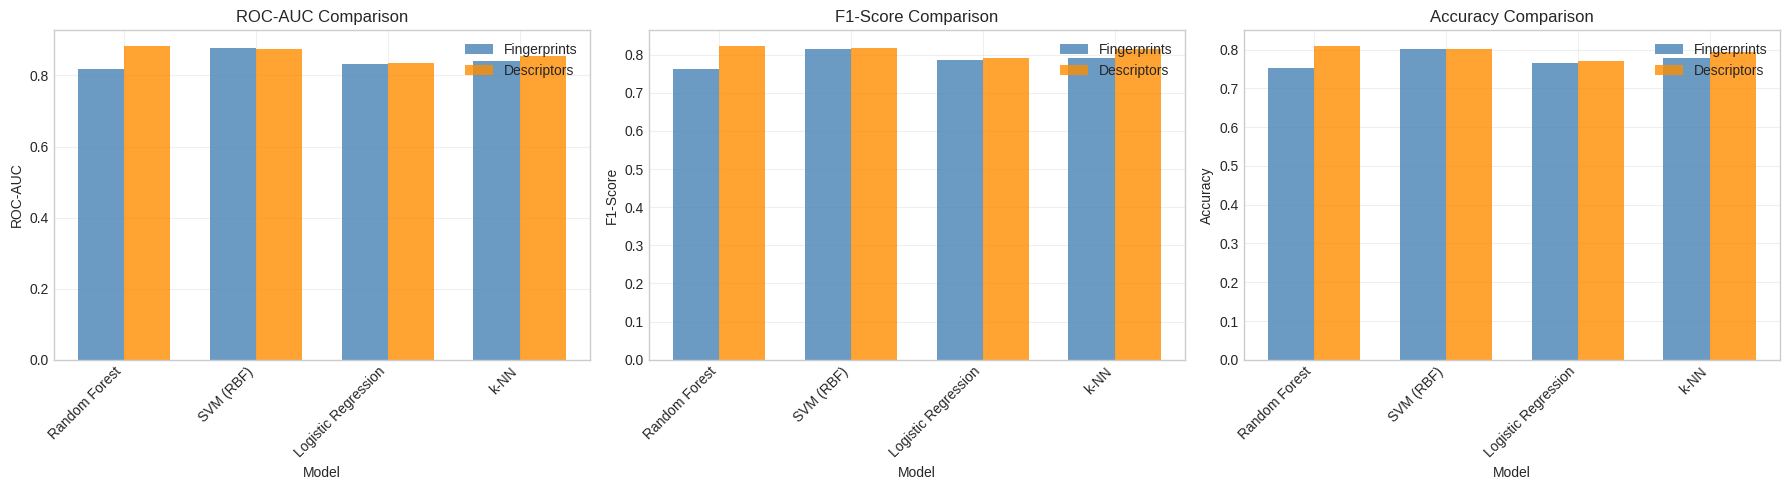

In [13]:
def select_best_model(results):
    """
    Select the best model based on ROC-AUC
    """
    best_score = -1
    best_model_name = None
    best_feature_type = None
    best_model = None
    
    print("\n" + "="*80)
    print("SELECTING BEST BASELINE MODEL")
    print("="*80)
    
    for model_name, model_data in results.items():
        for feature_type, data in model_data.items():
            score = data['metrics']['ROC-AUC']
            print(f"{model_name:20s} ({feature_type:12s}): ROC-AUC = {score:.4f}")
            
            if score > best_score:
                best_score = score
                best_model_name = model_name
                best_feature_type = feature_type
                best_model = data['model']
    
    print(f"\nBest model: {best_model_name} trained on {best_feature_type}")
    print(f"Best ROC-AUC: {best_score:.4f}")
    
    # Also check F1-score for balanced assessment
    best_f1 = results[best_model_name][best_feature_type]['metrics']['F1-Score']
    print(f"F1-Score: {best_f1:.4f}")
    
    return best_model_name, best_feature_type, best_model, best_score

# Select best model
best_model_name, best_feature_type, best_baseline_model, best_score = select_best_model(results)

# Visualize model performance comparison
def visualize_model_comparison(results):
    """
    Create visualization comparing all models
    """
    # Prepare data for plotting
    plot_data = []
    for model_name, model_data in results.items():
        for feature_type, data in model_data.items():
            metrics = data['metrics']
            plot_data.append({
                'Model': model_name,
                'Features': feature_type,
                'ROC-AUC': metrics['ROC-AUC'],
                'F1-Score': metrics['F1-Score'],
                'Accuracy': metrics['Accuracy']
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    metrics_to_plot = ['ROC-AUC', 'F1-Score', 'Accuracy']
    colors = {'Fingerprints': 'steelblue', 'Descriptors': 'darkorange'}
    
    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx]
        
        # Create grouped bar plot
        x = np.arange(len(results))
        width = 0.35
        
        for i, (model_name, model_data) in enumerate(results.items()):
            # Fingerprints
            fps_val = model_data['Fingerprints']['metrics'][metric]
            desc_val = model_data['Descriptors']['metrics'][metric]
            
            ax.bar(i - width/2, fps_val, width, label='Fingerprints' if i == 0 else "", 
                   color=colors['Fingerprints'], alpha=0.8)
            ax.bar(i + width/2, desc_val, width, label='Descriptors' if i == 0 else "", 
                   color=colors['Descriptors'], alpha=0.8)
        
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} Comparison')
        ax.set_xticks(range(len(results)))
        ax.set_xticklabels(list(results.keys()), rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return plot_df

# Generate visualization
plot_df = visualize_model_comparison(results)

In [29]:
def run_genetic_algorithm_with_tracking(X, y, n_features, population_size=100, generations=20, 
                                       cx_prob=0.8, mut_prob=0.2, elite_size=5):
    """
    Run genetic algorithm for feature selection with DEBUGGING
    """
    # Initialize statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    # Create initial population
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                     toolbox.attr_bool, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    population = toolbox.population(n=population_size)
    
    # ========== DEBUGGED EVALUATION FUNCTION ==========
    def evaluate_individual(individual):
        # Get selected feature indices
        selected_indices = [i for i, val in enumerate(individual) if val == 1]
        
        print(f"  DEBUG: Evaluating individual with {len(selected_indices)} features", end="")
        
        # CRITICAL: Must have at least 1 feature
        if len(selected_indices) == 0:
            print(" -> REJECTED (no features)")
            return (0.0,)
        
        # Check if we have enough samples for CV
        if len(y) < 5:  # Need at least 5 for 5-fold CV
            print(" -> REJECTED (not enough samples)")
            return (0.0,)
        
        # Select features
        X_selected = X[:, selected_indices]
        
        # Check if X_selected has any variance (all zeros or constant)
        if np.all(X_selected == 0) or np.all(X_selected == X_selected[0, :]):
            print(" -> REJECTED (constant features)")
            return (0.0,)
        
        try:
            # Use simpler CV with error handling
            cv_scores = []
            
            # Manual 5-fold CV with try-catch
            from sklearn.model_selection import StratifiedKFold
            skf = StratifiedKFold(n_splits=min(5, len(np.unique(y))), shuffle=True, random_state=42)
            
            for train_idx, test_idx in skf.split(X_selected, y):
                X_train_fold = X_selected[train_idx]
                X_test_fold = X_selected[test_idx]
                y_train_fold = y[train_idx]
                y_test_fold = y[test_idx]
                
                # Check if both classes are present in training
                if len(np.unique(y_train_fold)) < 2:
                    continue
                
                # Simple classifier
                clf = RandomForestClassifier(
                    n_estimators=50, 
                    random_state=42,
                    n_jobs=-1
                )
                clf.fit(X_train_fold, y_train_fold)
                
                # Predict probabilities
                if len(np.unique(y_test_fold)) < 2:
                    continue
                    
                y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
                fold_score = roc_auc_score(y_test_fold, y_pred_proba)
                cv_scores.append(fold_score)
            
            if len(cv_scores) == 0:
                print(" -> REJECTED (CV failed)")
                return (0.0,)
            
            roc_auc = np.mean(cv_scores)
            
            # Add penalty for too many features (optional, helps feature reduction)
            # Penalize if > 50% of features selected
            if len(selected_indices) > n_features * 0.5:
                penalty = 0.01 * (len(selected_indices) / n_features)
            else:
                penalty = 0.0
            
            fitness = roc_auc - penalty
            print(f" -> ACCEPTED (AUC: {roc_auc:.4f}, Fitness: {fitness:.4f})")
            
            return (fitness,)
            
        except Exception as e:
            print(f" -> ERROR: {str(e)[:50]}")
            return (0.0,)
    
    toolbox.register("evaluate", evaluate_individual)
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    # Initialize Hall of Fame
    hof = tools.HallOfFame(elite_size)
    
    # Initialize logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "avg", "std", "min", "max"]
    
    # Store population history for plotting
    population_history = []
    feature_statistics = []
    
    # ========== FIRST EVALUATION WITH DEBUGGING ==========
    print("\n" + "="*60)
    print("INITIAL EVALUATION (DEBUG MODE)")
    print("="*60)
    
    fitnesses = []
    for i, ind in enumerate(population[:5]):  # Only evaluate first 5 for debugging
        print(f"Individual {i}: ", end="")
        fit = toolbox.evaluate(ind)
        fitnesses.append(fit[0])
    
    print(f"\nSample fitnesses: {fitnesses}")
    
    if all(f == 0 for f in fitnesses):
        print("\n⚠️  WARNING: All fitnesses are 0!")
        print("Possible issues:")
        print("1. Check your X and y data")
        print("2. Make sure y has both classes (0 and 1)")
        print("3. Check feature variance")
        print("4. Data might be too small for 5-fold CV")
    
    # Now evaluate entire population
    print("\n" + "="*60)
    print("EVALUATING ENTIRE POPULATION")
    print("="*60)
    
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    # Record initial statistics
    hof.update(population)
    record = stats.compile(population)
    logbook.record(gen=0, **record)
    
    # Store initial population
    population_history.append([ind[:] for ind in population])
    feature_counts = [sum(ind) for ind in population]
    feature_statistics.append({
        'avg': np.mean(feature_counts),
        'min': np.min(feature_counts),
        'max': np.max(feature_counts),
        'std': np.std(feature_counts)
    })
    
    print(f"\nGeneration 0: Fitness {record}")
    print(f"  Features - Avg: {feature_statistics[0]['avg']:.1f}, "
          f"Min: {feature_statistics[0]['min']}, Max: {feature_statistics[0]['max']}")
    
    # ========== EVOLUTION LOOP ==========
    print("\n" + "="*60)
    print("STARTING EVOLUTION")
    print("="*60)
    
    for gen in range(1, generations + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - elite_size)
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cx_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        # Apply mutation
        for mutant in offspring:
            if random.random() < mut_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluate individuals with invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        if invalid_ind:
            print(f"\nGeneration {gen}: Evaluating {len(invalid_ind)} new individuals")
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
        
        # Add elite individuals from previous generation
        offspring.extend(hof[:])
        
        # Replace population
        population[:] = offspring
        
        # Update Hall of Fame
        hof.update(population)
        
        # Record statistics
        record = stats.compile(population)
        logbook.record(gen=gen, **record)
        
        # Store population for plotting
        population_history.append([ind[:] for ind in population])
        feature_counts = [sum(ind) for ind in population]
        feature_statistics.append({
            'avg': np.mean(feature_counts),
            'min': np.min(feature_counts),
            'max': np.max(feature_counts),
            'std': np.std(feature_counts)
        })
        
        if gen % 5 == 0 or gen == generations:
            print(f"\nGeneration {gen}: Fitness {record}")
            print(f"  Features - Avg: {feature_statistics[-1]['avg']:.1f}, "
                  f"Min: {feature_statistics[-1]['min']}, Max: {feature_statistics[-1]['max']}")
    
    # Get best individual
    best_ind = hof[0]
    best_fitness = best_ind.fitness.values[0]
    selected_indices = [i for i, val in enumerate(best_ind) if val == 1]
    
    print(f"\n" + "="*60)
    print("GENETIC ALGORITHM COMPLETED!")
    print("="*60)
    print(f"Best individual fitness (ROC-AUC): {best_fitness:.4f}")
    print(f"Number of selected features: {len(selected_indices)}")
    print(f"Feature reduction: {n_features} -> {len(selected_indices)} "
          f"({100 * (1 - len(selected_indices)/n_features):.1f}% reduction)")
    
    return best_ind, selected_indices, logbook, population_history, feature_statistics, hof

In [35]:
def run_genetic_algorithm_with_tracking(X, y, n_features, population_size=100, generations=20, 
                                       cx_prob=0.8, mut_prob=0.2, elite_size=5):
    """
    Run genetic algorithm for feature selection with FIXED evaluation
    """
    # ========== CREATE CLOSURE FOR EVALUATION ==========
    # This captures X and y in the function's closure
    def make_evaluator(X_data, y_data):
        def evaluate_individual(individual):
            # Get selected feature indices
            selected_indices = [i for i, val in enumerate(individual) if val == 1]
            
            # CRITICAL: Must have at least 1 feature
            if len(selected_indices) == 0:
                return (0.0,)
            
            # Check if we have enough samples for CV
            if len(y_data) < 5:
                return (0.0,)
            
            # Select features
            X_selected = X_data[:, selected_indices]
            
            # Check if X_selected has any variance
            if np.all(X_selected == 0) or np.all(X_selected == X_selected[0, :]):
                return (0.0,)
            
            try:
                # Use simpler CV with error handling
                cv_scores = []
                
                # Manual 5-fold CV
                from sklearn.model_selection import StratifiedKFold
                skf = StratifiedKFold(n_splits=min(5, len(np.unique(y_data))), 
                                     shuffle=True, random_state=42)
                
                for train_idx, test_idx in skf.split(X_selected, y_data):
                    X_train_fold = X_selected[train_idx]
                    X_test_fold = X_selected[test_idx]
                    y_train_fold = y_data[train_idx]
                    y_test_fold = y_data[test_idx]
                    
                    # Check if both classes are present
                    if len(np.unique(y_train_fold)) < 2:
                        continue
                    
                    # Simple classifier
                    clf = RandomForestClassifier(
                        n_estimators=50, 
                        random_state=42,
                        n_jobs=-1
                    )
                    clf.fit(X_train_fold, y_train_fold)
                    
                    # Predict probabilities
                    if len(np.unique(y_test_fold)) < 2:
                        continue
                        
                    y_pred_proba = clf.predict_proba(X_test_fold)[:, 1]
                    fold_score = roc_auc_score(y_test_fold, y_pred_proba)
                    cv_scores.append(fold_score)
                
                if len(cv_scores) == 0:
                    return (0.0,)
                
                roc_auc = np.mean(cv_scores)
                
                # Add penalty for too many features
                if len(selected_indices) > n_features * 0.5:
                    penalty = 0.01 * (len(selected_indices) / n_features)
                else:
                    penalty = 0.0
                
                fitness = roc_auc - penalty
                return (fitness,)
                
            except Exception as e:
                return (0.0,)
        
        return evaluate_individual
    
    # ========== SETUP DEAP ==========
    # Initialize statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    # Create initial population
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                     toolbox.attr_bool, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Register evaluation function WITH X and y bound
    evaluator = make_evaluator(X, y)
    toolbox.register("evaluate", evaluator)
    
    # Register genetic operators
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    # ========== INITIAL POPULATION ==========
    population = toolbox.population(n=population_size)
    hof = tools.HallOfFame(elite_size)
    logbook = tools.Logbook()
    logbook.header = ["gen", "avg", "std", "min", "max"]
    
    # Store population history
    population_history = []
    feature_statistics = []
    
    # ========== TEST EVALUATION FIRST ==========
    print("="*60)
    print("TESTING EVALUATION FUNCTION")
    print("="*60)
    
    # Test with a simple individual (select first 10 features)
    test_individual = [1] * 10 + [0] * (n_features - 10)
    test_fitness = evaluator(test_individual)[0]
    print(f"Test individual (first 10 features) fitness: {test_fitness:.4f}")
    
    # Test with random individual
    random_individual = [random.randint(0, 1) for _ in range(n_features)]
    random_fitness = evaluator(random_individual)[0]
    print(f"Random individual fitness: {random_fitness:.4f}")
    
    # Test with all features
    all_features_individual = [1] * n_features
    all_fitness = evaluator(all_features_individual)[0]
    print(f"All features individual fitness: {all_fitness:.4f}")
    
    if test_fitness == 0 and random_fitness == 0 and all_fitness == 0:
        print("\n⚠️ ALL TESTS RETURNED 0!")
        print("The problem is in the evaluation function or data.")
        print("Let me test a simpler evaluation...")
        
        # Test ultra-simple evaluation
        def simple_test(ind):
            selected = sum(ind)
            if selected == 0:
                return (0.0,)
            return (0.5 + selected/n_features,)
        
        simple_result = simple_test(test_individual)
        print(f"Simple test fitness: {simple_result[0]}")
        
        # Check data directly
        print("\nChecking data directly...")
        print(f"X shape: {X.shape}, y shape: {y.shape}")
        print(f"y classes: {np.unique(y, return_counts=True)}")
        print(f"X min/max: {X.min()}, {X.max()}")
        print(f"X NaN: {np.isnan(X).sum()}")
        
        # Try manual calculation
        print("\nTrying manual ROC-AUC calculation...")
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import roc_auc_score
        
        # Use first 10 features
        X_test = X[:, :10]
        X_train, X_val, y_train, y_val = train_test_split(
            X_test, y, test_size=0.2, random_state=42, stratify=y
        )
        
        clf = RandomForestClassifier(n_estimators=50, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_val)[:, 1]
        
        try:
            auc = roc_auc_score(y_val, y_pred)
            print(f"Manual ROC-AUC with 10 features: {auc:.4f}")
        except Exception as e:
            print(f"Manual calculation failed: {e}")
    
    # ========== INITIAL EVALUATION ==========
    print("\n" + "="*60)
    print("EVALUATING INITIAL POPULATION")
    print("="*60)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    # Record statistics
    hof.update(population)
    record = stats.compile(population)
    logbook.record(gen=0, **record)
    
    # Store initial population
    population_history.append([ind[:] for ind in population])
    feature_counts = [sum(ind) for ind in population]
    feature_statistics.append({
        'avg': np.mean(feature_counts),
        'min': np.min(feature_counts),
        'max': np.max(feature_counts),
        'std': np.std(feature_counts)
    })
    
    print(f"Generation 0: Fitness {record}")
    print(f"  Features - Avg: {feature_statistics[0]['avg']:.1f}, "
          f"Min: {feature_statistics[0]['min']}, Max: {feature_statistics[0]['max']}")
    
    # ========== EVOLUTION LOOP ==========
    print("\n" + "="*60)
    print("STARTING EVOLUTION")
    print("="*60)
    
    for gen in range(1, generations + 1):
        # Select the next generation
        offspring = toolbox.select(population, len(population) - elite_size)
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cx_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        # Apply mutation
        for mutant in offspring:
            if random.random() < mut_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluate invalid individuals
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        if invalid_ind:
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
        
        # Add elite individuals
        offspring.extend(hof[:])
        
        # Replace population
        population[:] = offspring
        
        # Update Hall of Fame
        hof.update(population)
        
        # Record statistics
        record = stats.compile(population)
        logbook.record(gen=gen, **record)
        
        # Store population for plotting
        population_history.append([ind[:] for ind in population])
        feature_counts = [sum(ind) for ind in population]
        feature_statistics.append({
            'avg': np.mean(feature_counts),
            'min': np.min(feature_counts),
            'max': np.max(feature_counts),
            'std': np.std(feature_counts)
        })
        
        if gen % 5 == 0 or gen == generations:
            print(f"Generation {gen}: Fitness {record}")
            print(f"  Features - Avg: {feature_statistics[-1]['avg']:.1f}, "
                  f"Min: {feature_statistics[-1]['min']}, Max: {feature_statistics[-1]['max']}")
    
    # ========== FINAL RESULTS ==========
    best_ind = hof[0]
    best_fitness = best_ind.fitness.values[0]
    selected_indices = [i for i, val in enumerate(best_ind) if val == 1]
    
    print("\n" + "="*60)
    print("GENETIC ALGORITHM COMPLETED!")
    print("="*60)
    print(f"Best individual fitness (ROC-AUC): {best_fitness:.4f}")
    print(f"Number of selected features: {len(selected_indices)}")
    print(f"Feature reduction: {n_features} -> {len(selected_indices)} "
          f"({100 * (1 - len(selected_indices)/n_features):.1f}% reduction)")
    
    return best_ind, selected_indices, logbook, population_history, feature_statistics, hof

In [38]:
def plot_ga_evolution_complete(logbook, selected_indices, n_features, 
                              population_history=None, feature_statistics=None):
    """
    Plot genetic algorithm evolution with complete tracking - FIXED VERSION
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # ====== Plot 1: Fitness Evolution ======
    ax1 = axes[0, 0]
    
    # FIX: Use logbook.select() properly
    gen = logbook.select("gen")  # This should return a list of generation numbers
    avg = logbook.select("avg")
    max_fit = logbook.select("max")
    min_fit = logbook.select("min")
    std = logbook.select("std")
    
    # Convert to lists if they're not already
    if not isinstance(gen, (list, np.ndarray)):
        gen = list(range(len(avg)))
    
    # Main fitness lines
    ax1.plot(gen, avg, label="Average Fitness", linewidth=2, color='green')
    ax1.plot(gen, max_fit, label="Maximum Fitness", linewidth=3, color='blue', linestyle='-')
    ax1.plot(gen, min_fit, label="Minimum Fitness", linewidth=2, color='red', linestyle=':')
    
    # Add std deviation as shaded area
    upper_bound = [a + s for a, s in zip(avg, std)]
    lower_bound = [a - s for a, s in zip(avg, std)]
    ax1.fill_between(gen, lower_bound, upper_bound, alpha=0.2, color='green', label='±1 STD')
    
    ax1.set_xlabel("Generation", fontsize=12)
    ax1.set_ylabel("Fitness (ROC-AUC)", fontsize=12)
    ax1.set_title("Fitness Evolution", fontsize=14, fontweight='bold')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([min(min_fit) * 0.995, max(max_fit) * 1.005])
    
    # ====== Plot 2: Feature Count Evolution ======
    ax2 = axes[0, 1]
    
    if population_history and feature_statistics:
        # Plot full feature evolution
        generations = list(range(len(feature_statistics)))
        avg_features = [fs['avg'] for fs in feature_statistics]
        min_features = [fs['min'] for fs in feature_statistics]
        max_features = [fs['max'] for fs in feature_statistics]
        
        # Shaded region for min-max range
        ax2.fill_between(generations, min_features, max_features, 
                        alpha=0.2, color='darkred', label='Feature Count Range')
        
        # Average line
        ax2.plot(generations, avg_features, linewidth=3, 
                color='darkred', label='Average Features')
        
        # Add markers at specific generations
        for g in [0, 5, 10, 15, 20]:
            if g < len(avg_features):
                ax2.scatter(g, avg_features[g], color='black', zorder=5, s=50)
                ax2.annotate(f'{avg_features[g]:.0f}', 
                           (g, avg_features[g]), 
                           xytext=(0, 10), textcoords='offset points',
                           ha='center', fontsize=9)
    else:
        # Fallback: Plot only final result
        ax2.axhline(y=len(selected_indices), color='green', linewidth=3, 
                   linestyle='-', label=f'Final: {len(selected_indices)} features')
    
    # Reference lines
    ax2.axhline(y=n_features, color='gray', linewidth=2, 
               linestyle='--', alpha=0.7, label=f'Initial: {n_features} features')
    ax2.axhline(y=len(selected_indices), color='green', linewidth=2, 
               linestyle='--', alpha=0.7)
    
    ax2.set_xlabel("Generation", fontsize=12)
    ax2.set_ylabel("Number of Selected Features", fontsize=12)
    ax2.set_title("Feature Selection Evolution", fontsize=14, fontweight='bold')
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, n_features * 1.1])
    
    # ====== Plot 3: Feature Count Distribution ======
    ax3 = axes[1, 0]
    
    if population_history:
        # Get feature counts for all individuals in all generations
        all_feature_counts = []
        for pop in population_history:
            all_feature_counts.extend([sum(ind) for ind in pop])
        
        # Create histogram
        ax3.hist(all_feature_counts, bins=30, alpha=0.7, color='skyblue', 
                edgecolor='black', density=True)
        
        # Add vertical lines
        ax3.axvline(x=n_features, color='gray', linestyle='--', linewidth=2, 
                   label=f'Initial ({n_features})')
        ax3.axvline(x=len(selected_indices), color='green', linestyle='--', 
                   linewidth=2, label=f'Final ({len(selected_indices)})')
        
        # Add KDE
        from scipy.stats import gaussian_kde
        if len(all_feature_counts) > 1:
            try:
                kde = gaussian_kde(all_feature_counts)
                x_range = np.linspace(min(all_feature_counts), max(all_feature_counts), 1000)
                ax3.plot(x_range, kde(x_range), color='darkblue', linewidth=2, label='Density')
            except:
                pass  # Skip KDE if it fails
        
        ax3.set_xlabel("Number of Features", fontsize=12)
        ax3.set_ylabel("Density", fontsize=12)
        ax3.set_title("Distribution of Feature Counts", fontsize=14, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # ====== Plot 4: Improvement Over Generations ======
    ax4 = axes[1, 1]
    
    # Calculate improvement from initial generation
    max_fitness = max_fit  # Already extracted
    if isinstance(max_fitness, np.ndarray):
        max_fitness = max_fitness.tolist()
    
    initial_fitness = max_fitness[0]
    improvement = [(f - initial_fitness) / initial_fitness * 100 for f in max_fitness]
    
    # Make sure gen is iterable
    if isinstance(gen, (int, float)):
        gen = list(range(len(improvement)))
    
    bars = ax4.bar(gen, improvement, alpha=0.7, color='orange', edgecolor='darkorange')
    
    # Color the best generation differently
    best_gen = np.argmax(max_fitness)
    if len(bars) > best_gen:
        bars[best_gen].set_color('gold')
        bars[best_gen].set_edgecolor('darkgoldenrod')
    
    # Add value labels on top of bars
    for i, (g, imp) in enumerate(zip(gen, improvement)):
        if i % 5 == 0 or i == len(improvement) - 1 or i == best_gen:
            # Make sure we don't try to plot outside bounds
            if i < len(bars):
                ax4.text(g, imp + 0.1, f'{imp:.2f}%', ha='center', va='bottom', 
                        fontsize=9, fontweight='bold' if i == best_gen else 'normal')
    
    ax4.axhline(y=0, color='black', linewidth=0.5)
    ax4.set_xlabel("Generation", fontsize=12)
    ax4.set_ylabel("Improvement (%)", fontsize=12)
    ax4.set_title(f"Fitness Improvement Relative to Generation 0\nBest: Generation {best_gen} ({improvement[best_gen]:.2f}%)", 
                 fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    print(f"Initial Features: {n_features}")
    print(f"Final Features: {len(selected_indices)}")
    print(f"Reduction: {n_features - len(selected_indices)} features ({100 * (1 - len(selected_indices)/n_features):.1f}%)")
    print(f"Initial Best Fitness: {max_fitness[0]:.4f}")
    print(f"Final Best Fitness: {max_fitness[-1]:.4f}")
    print(f"Total Improvement: {improvement[-1]:.2f}%")
    print(f"Average Features per Individual: {np.mean([fs['avg'] for fs in feature_statistics]):.1f}")
    print("=" * 60)

TESTING EVALUATION FUNCTION
Test individual (first 10 features) fitness: 0.0000
Random individual fitness: 0.0000
All features individual fitness: 0.0000

⚠️ ALL TESTS RETURNED 0!
The problem is in the evaluation function or data.
Let me test a simpler evaluation...
Simple test fitness: 0.564935064935065

Checking data directly...
X shape: (5204, 154), y shape: (5204,)
y classes: (array([0, 1]), array([2407, 2797]))
X min/max: -40.86291603839982, 80.64738061462381
X NaN: 0

Trying manual ROC-AUC calculation...
Manual ROC-AUC with 10 features: 0.8267

EVALUATING INITIAL POPULATION
Generation 0: Fitness {'avg': np.float64(0.8473535450654684), 'std': np.float64(0.0041899401149859085), 'min': np.float64(0.8385343776355061), 'max': np.float64(0.856504393422395)}
  Features - Avg: 76.2, Min: 57, Max: 91

STARTING EVOLUTION
Generation 5: Fitness {'avg': np.float64(0.8569345469841876), 'std': np.float64(0.0029440959611629104), 'min': np.float64(0.8492445880731233), 'max': np.float64(0.86184454

TypeError: 'int' object is not iterable

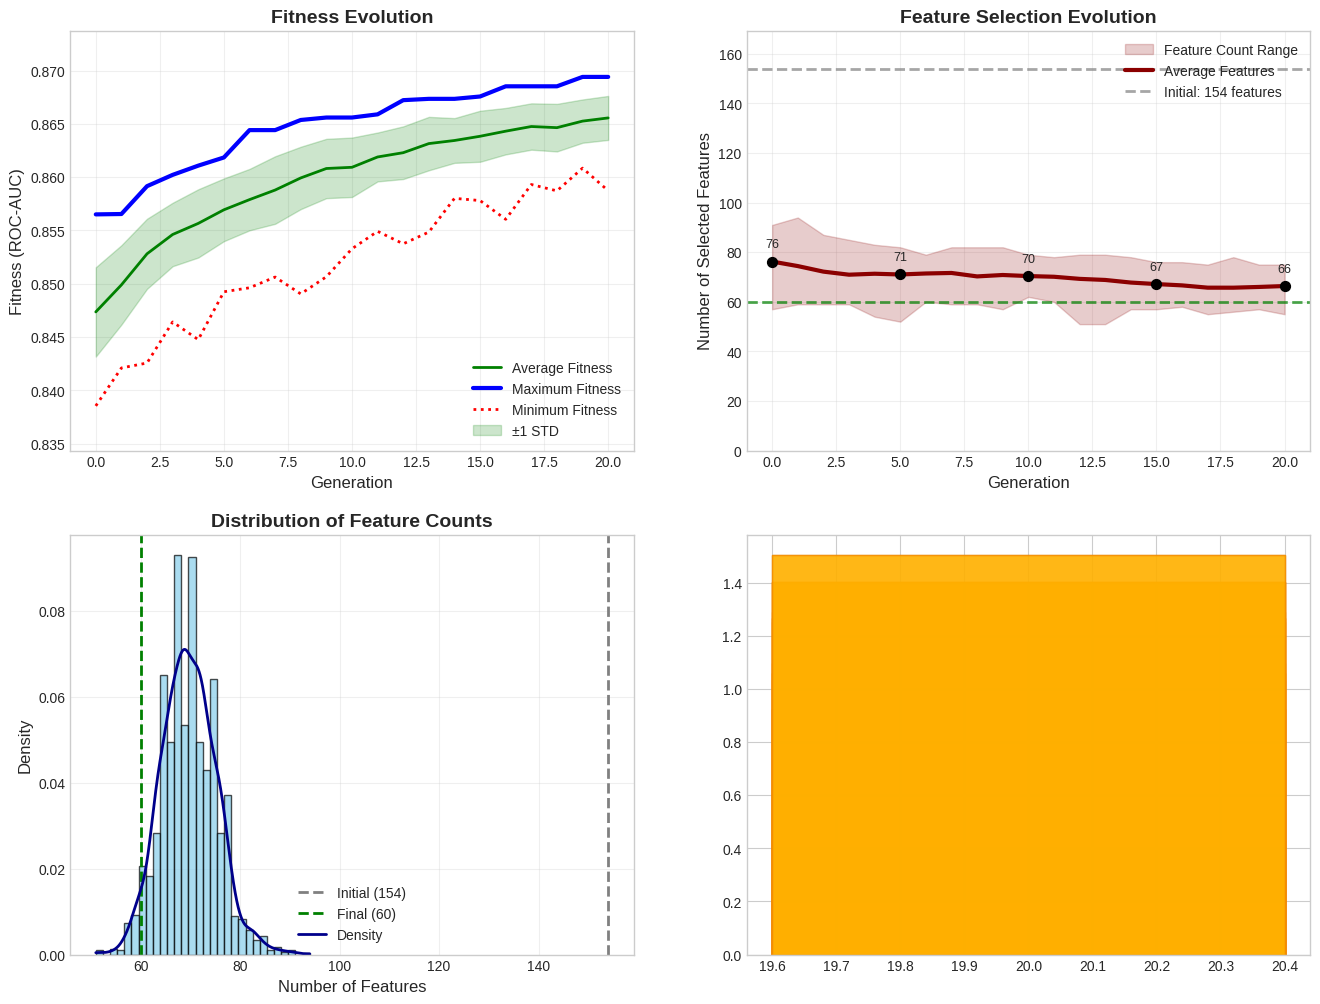

In [ ]:
# Run the enhanced GA with tracking
best_ind, selected_indices, logbook, population_history, feature_statistics, hof = \
    run_genetic_algorithm_with_tracking(
        X_train, y_train,  # ← MUST MATCH!
        n_features=X_train.shape[1],
        population_size=100,
        generations=20,
        cx_prob=0.8,
        mut_prob=0.2,
        elite_size=5
    )


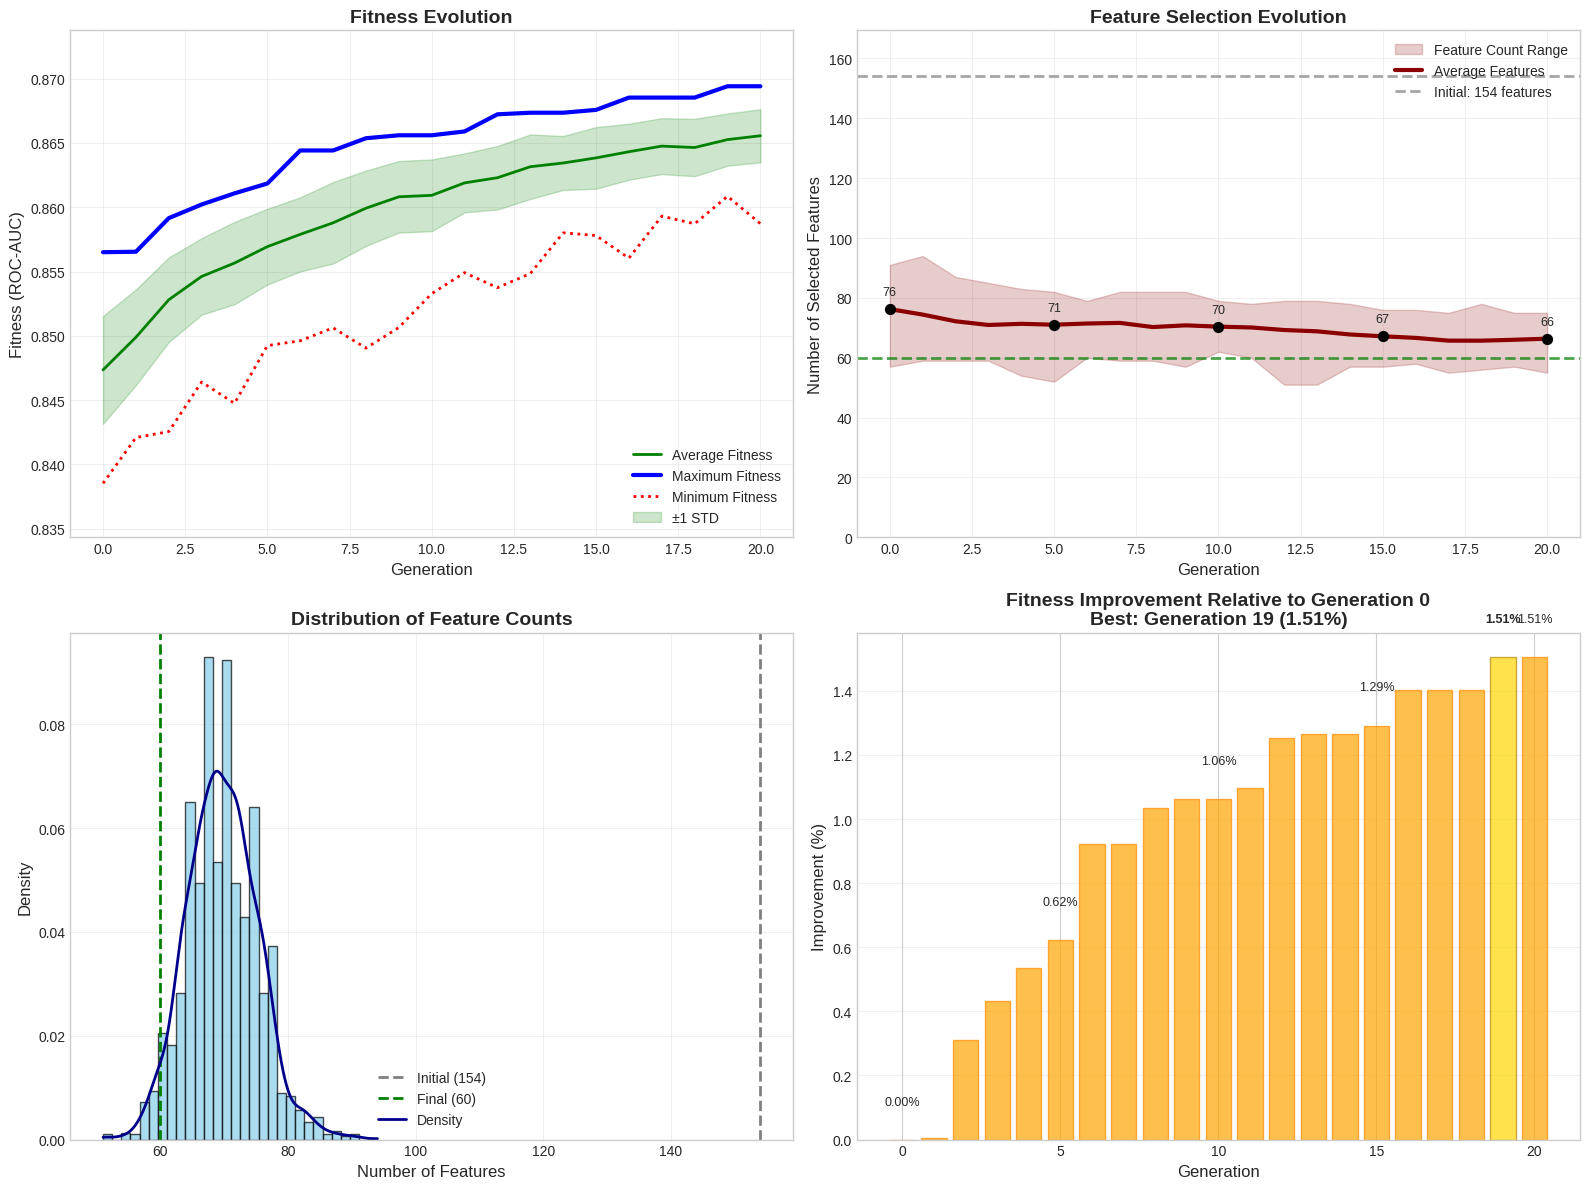

SUMMARY STATISTICS
Initial Features: 154
Final Features: 60
Reduction: 94 features (61.0%)
Initial Best Fitness: 0.8565
Final Best Fitness: 0.8694
Total Improvement: 1.51%
Average Features per Individual: 69.7


In [39]:
# Plot the complete evolution
plot_ga_evolution_complete(
    logbook, 
    selected_indices, 
    X_train.shape[1], 
    population_history, 
    feature_statistics
)

array([0, 0, 0, ..., 1, 1, 1], shape=(6505,))

In [40]:
def retrain_with_ga_features(X_train, X_test, y_train, y_test, selected_indices, model_type='rf'):
    """
    Retrain model with GA-selected features
    """
    print("\n" + "="*80)
    print("RETRAINING WITH GA-SELECTED FEATURES")
    print("="*80)
    
    # Subset features
    X_train_ga = X_train[:, selected_indices]
    X_test_ga = X_test[:, selected_indices]
    
    print(f"GA-selected feature matrix shape: {X_train_ga.shape}")
    
    # Choose model based on best baseline
    if model_type == 'rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            random_state=RANDOM_SEED,
            n_jobs=-1
        )
    elif model_type == 'svm':
        model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=RANDOM_SEED)
    else:
        model = RandomForestClassifier(random_state=RANDOM_SEED)
    
    # Train and evaluate
    model.fit(X_train_ga, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_ga)
    y_pred_proba = model.predict_proba(X_test_ga)[:, 1]
    
    # Metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    print("\nPerformance with GA-selected features:")
    for metric, value in metrics.items():
        print(f"{metric:12s}: {value:.4f}")
    
    # Compare with baseline
    if best_feature_type == 'Descriptors':
        baseline_metrics = results[best_model_name]['Descriptors']['metrics']
        print(f"\nComparison with baseline ({len(selected_descriptors)} descriptors):")
        print(f"{'Metric':12s} {'Baseline':10s} {'GA-Selected':10s} {'Delta':10s}")
        print("-" * 50)
        for metric in ['Accuracy', 'ROC-AUC', 'F1-Score']:
            delta = metrics[metric] - baseline_metrics[metric]
            print(f"{metric:12s} {baseline_metrics[metric]:<10.4f} {metrics[metric]:<10.4f} {delta:+.4f}")
    
    return model, metrics, X_train_ga, X_test_ga

# Retrain with GA features
ga_model, ga_metrics, X_train_ga, X_test_ga = retrain_with_ga_features(
    X_train_desc, X_test_desc, y_train, y_test, selected_indices
)

# Store GA-selected feature names for later use
ga_selected_descriptors = selected_descriptor_names


RETRAINING WITH GA-SELECTED FEATURES
GA-selected feature matrix shape: (5204, 60)

Performance with GA-selected features:
Accuracy    : 0.8032
ROC-AUC     : 0.8791
Precision   : 0.8142
Recall      : 0.8212
F1-Score    : 0.8177

Comparison with baseline (154 descriptors):
Metric       Baseline   GA-Selected Delta     
--------------------------------------------------
Accuracy     0.8094     0.8032     -0.0061
ROC-AUC      0.8828     0.8791     -0.0037
F1-Score     0.8223     0.8177     -0.0047


UNSUPERVISED ANALYSIS FOR APPLICABILITY DOMAIN

1. PRINCIPAL COMPONENT ANALYSIS (PCA)
----------------------------------------
Explained variance ratio: [0.12881048 0.09934372]
Total explained variance: 0.228


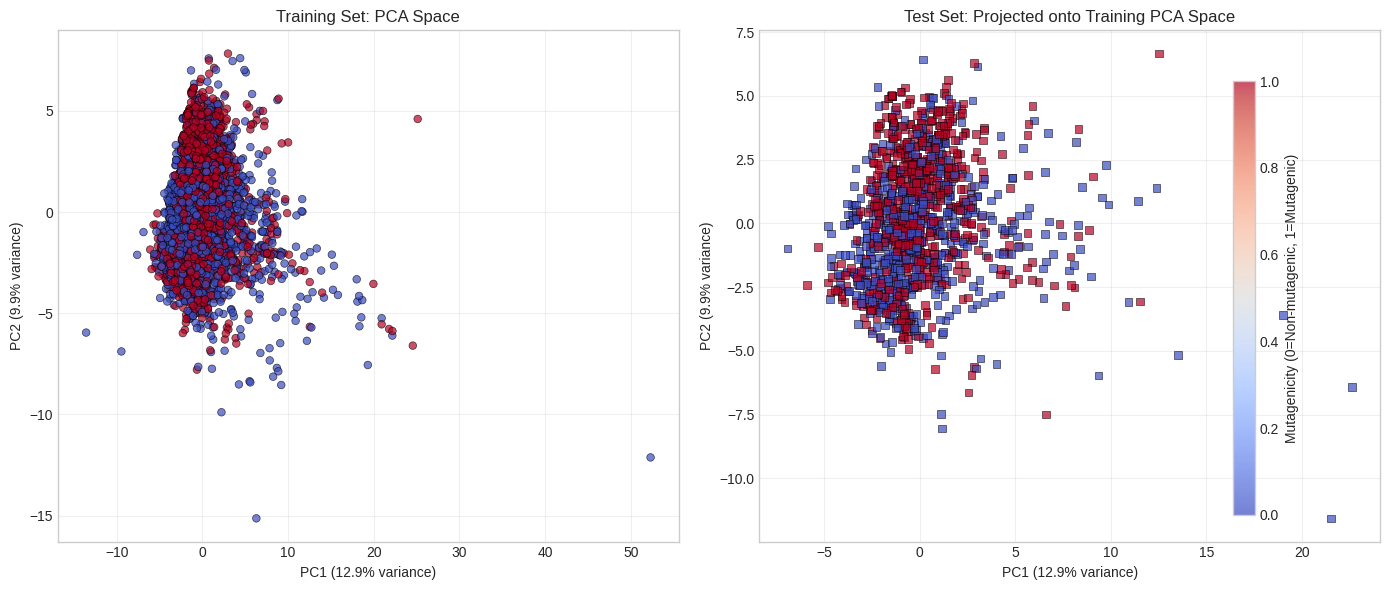


IMPORTANT: Why PCA Alone is NOT an Applicability Domain

PCA is a dimensionality reduction technique, NOT an applicability domain method:

1. PCA captures global variance structure but doesn't define boundaries
2. Test compounds can project within PCA space but still be outliers
3. PCA doesn't account for local density or cluster membership
4. No quantitative measure of "distance" from training data
5. Visual inspection alone is subjective and unreliable

A proper AD requires quantitative, distance-based measures!



In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

print("="*80)
print("UNSUPERVISED ANALYSIS FOR APPLICABILITY DOMAIN")
print("="*80)

def perform_pca_analysis(X_train, X_test, y_train, y_test, n_components=2):
    """
    Perform PCA analysis for applicability domain assessment
    """
    print(f"\n1. PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("-"*40)
    
    # Fit PCA on training data
    pca = PCA(n_components=n_components, random_state=RANDOM_SEED)
    X_train_pca = pca.fit_transform(X_train)
    
    # Transform test data using same PCA
    X_test_pca = pca.transform(X_test)
    
    # Explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.3f}")
    
    # Plot PCA space
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Training set
    ax1 = axes[0]
    scatter1 = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                          c=y_train, cmap='coolwarm', alpha=0.7, 
                          s=30, edgecolors='k', linewidth=0.5)
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax1.set_title('Training Set: PCA Space')
    ax1.grid(True, alpha=0.3)
    
    # Test set
    ax2 = axes[1]
    scatter2 = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                          c=y_test, cmap='coolwarm', alpha=0.7,
                          s=30, edgecolors='k', linewidth=0.5, 
                          marker='s')  # Squares for test set
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax2.set_title('Test Set: Projected onto Training PCA Space')
    ax2.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = fig.colorbar(scatter1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Mutagenicity (0=Non-mutagenic, 1=Mutagenic)')
    
    plt.tight_layout()
    plt.show()
    
    return pca, X_train_pca, X_test_pca

# Perform PCA on GA-selected features
pca_model, X_train_pca, X_test_pca = perform_pca_analysis(
    X_train_ga, X_test_ga, y_train, y_test
)

# Why PCA Alone is NOT an Applicability Domain:
print("\n" + "="*80)
print("IMPORTANT: Why PCA Alone is NOT an Applicability Domain")
print("="*80)
print("""
PCA is a dimensionality reduction technique, NOT an applicability domain method:

1. PCA captures global variance structure but doesn't define boundaries
2. Test compounds can project within PCA space but still be outliers
3. PCA doesn't account for local density or cluster membership
4. No quantitative measure of "distance" from training data
5. Visual inspection alone is subjective and unreliable

A proper AD requires quantitative, distance-based measures!
""")


2. KMEANS CLUSTERING FOR APPLICABILITY DOMAIN
----------------------------------------
Determining optimal number of clusters...
Optimal cluster count (simplified elbow): 4


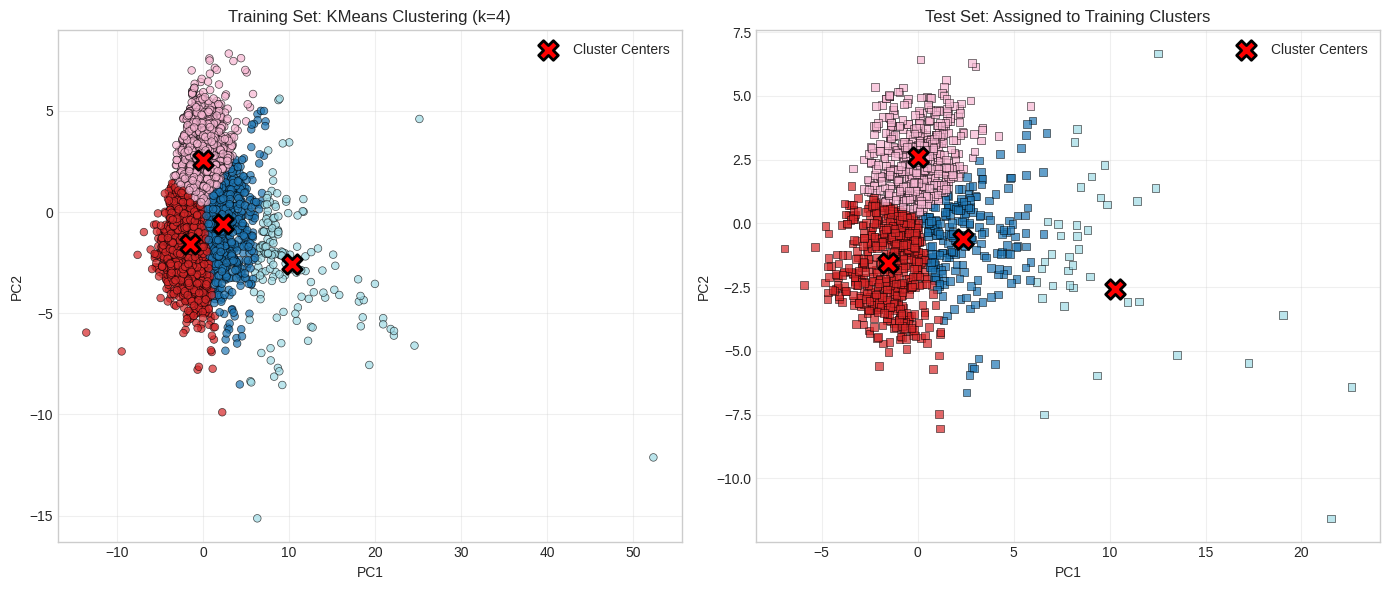

In [42]:
def perform_clustering_analysis(X_train_pca, X_test_pca, n_clusters=5):
    """
    Perform KMeans clustering for applicability domain definition
    """
    print(f"\n2. KMEANS CLUSTERING FOR APPLICABILITY DOMAIN")
    print("-"*40)
    
    # Determine optimal number of clusters using elbow method
    print("Determining optimal number of clusters...")
    inertias = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init=10)
        kmeans.fit(X_train_pca)
        inertias.append(kmeans.inertia_)
    
    # Find elbow point (simplified)
    diffs = np.diff(inertias)
    diffs_ratio = diffs[1:] / diffs[:-1]
    optimal_k = k_range[np.argmin(diffs_ratio) + 2]  # +2 for offset
    
    print(f"Optimal cluster count (simplified elbow): {optimal_k}")
    
    # Fit KMeans with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=RANDOM_SEED, n_init=10)
    train_clusters = kmeans.fit_predict(X_train_pca)
    
    # Assign test compounds to nearest cluster
    test_clusters = kmeans.predict(X_test_pca)
    
    # Calculate distances to cluster centroids
    train_distances = kmeans.transform(X_train_pca)
    train_min_distances = np.min(train_distances, axis=1)
    
    test_distances = kmeans.transform(X_test_pca)
    test_min_distances = np.min(test_distances, axis=1)
    
    # Plot clustering results
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Training clusters
    ax1 = axes[0]
    scatter1 = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                          c=train_clusters, cmap='tab20', alpha=0.7,
                          s=30, edgecolors='k', linewidth=0.5)
    
    # Plot cluster centers
    centers = kmeans.cluster_centers_
    ax1.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', 
                s=200, label='Cluster Centers', edgecolors='k', linewidth=2)
    
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_title(f'Training Set: KMeans Clustering (k={optimal_k})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Test clusters (projected)
    ax2 = axes[1]
    scatter2 = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                          c=test_clusters, cmap='tab20', alpha=0.7,
                          s=30, edgecolors='k', linewidth=0.5, marker='s')
    
    # Plot cluster centers (same as training)
    ax2.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', 
                s=200, label='Cluster Centers', edgecolors='k', linewidth=2)
    
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_title('Test Set: Assigned to Training Clusters')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return kmeans, train_clusters, test_clusters, train_min_distances, test_min_distances

# Perform clustering
kmeans_model, train_clusters, test_clusters, train_min_distances, test_min_distances = perform_clustering_analysis(
    X_train_pca, X_test_pca
)


3. DISTANCE-BASED APPLICABILITY DOMAIN
----------------------------------------
Training set size: 5204
Distance statistics (training):
  Mean: 1.8146
  Std: 1.2423
  Min: 0.0110
  Max: 43.1040
  95% percentile: 3.5003

Test set applicability domain assessment:
  Inside AD: 1237 (95.1%)
  Outside AD: 64 (4.9%)


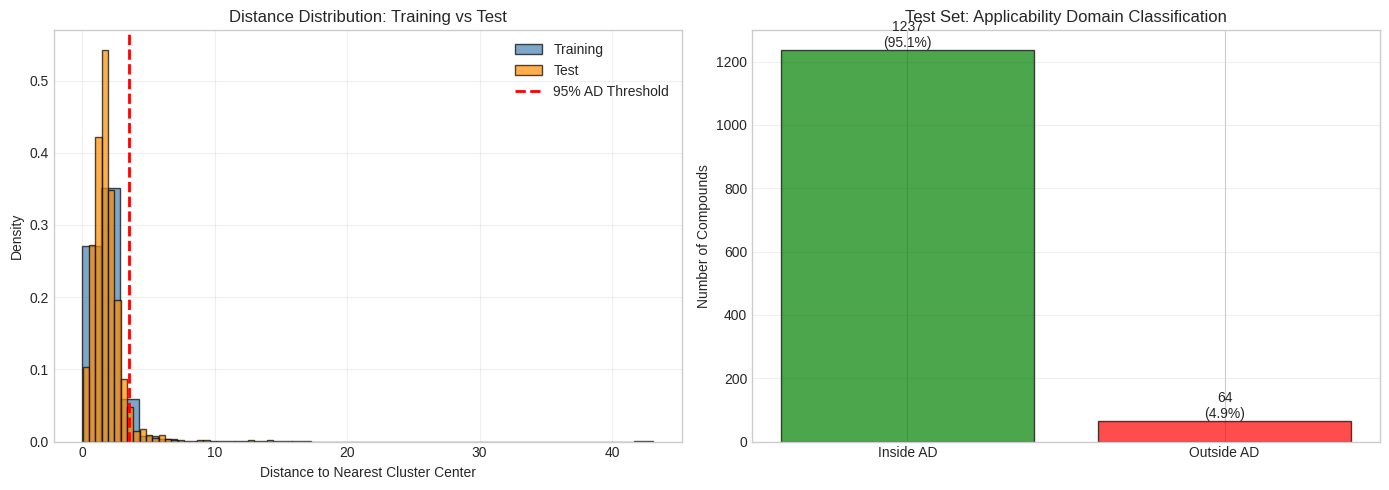


Model Performance Analysis by Applicability Domain:
Inside AD (n=1237):
  Accuracy: 0.8036
Outside AD (n=64):
  Accuracy: 0.7969


In [43]:
def define_applicability_domain(train_min_distances, test_min_distances, confidence_level=0.95):
    """
    Define applicability domain based on distance distribution
    """
    print(f"\n3. DISTANCE-BASED APPLICABILITY DOMAIN")
    print("-"*40)
    
    # Calculate threshold based on training distribution
    threshold = np.percentile(train_min_distances, confidence_level * 100)
    
    print(f"Training set size: {len(train_min_distances)}")
    print(f"Distance statistics (training):")
    print(f"  Mean: {np.mean(train_min_distances):.4f}")
    print(f"  Std: {np.std(train_min_distances):.4f}")
    print(f"  Min: {np.min(train_min_distances):.4f}")
    print(f"  Max: {np.max(train_min_distances):.4f}")
    print(f"  {confidence_level:.0%} percentile: {threshold:.4f}")
    
    # Classify test compounds
    test_in_ad = test_min_distances <= threshold
    test_out_ad = test_min_distances > threshold
    
    print(f"\nTest set applicability domain assessment:")
    print(f"  Inside AD: {np.sum(test_in_ad)} ({np.mean(test_in_ad):.1%})")
    print(f"  Outside AD: {np.sum(test_out_ad)} ({np.mean(test_out_ad):.1%})")
    
    # Visualize distance distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution plot
    ax1 = axes[0]
    ax1.hist(train_min_distances, bins=30, alpha=0.7, label='Training', 
             density=True, color='steelblue', edgecolor='black')
    ax1.hist(test_min_distances, bins=30, alpha=0.7, label='Test', 
             density=True, color='darkorange', edgecolor='black')
    ax1.axvline(threshold, color='red', linestyle='--', linewidth=2, 
                label=f'{confidence_level:.0%} AD Threshold')
    ax1.set_xlabel('Distance to Nearest Cluster Center')
    ax1.set_ylabel('Density')
    ax1.set_title('Distance Distribution: Training vs Test')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # AD classification
    ax2 = axes[1]
    categories = ['Inside AD', 'Outside AD']
    counts = [np.sum(test_in_ad), np.sum(test_out_ad)]
    
    bars = ax2.bar(categories, counts, color=['green', 'red'], alpha=0.7, edgecolor='black')
    ax2.set_ylabel('Number of Compounds')
    ax2.set_title('Test Set: Applicability Domain Classification')
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}\n({count/len(test_min_distances):.1%})',
                ha='center', va='bottom')
    
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze model performance inside vs outside AD
    print(f"\nModel Performance Analysis by Applicability Domain:")
    
    # We need predictions to analyze performance
    # Get predictions from GA model
    y_pred_ga = ga_model.predict(X_test_ga)
    y_true = y_test
    
    # Performance inside AD
    if np.any(test_in_ad):
        inside_acc = accuracy_score(y_true[test_in_ad], y_pred_ga[test_in_ad])
        print(f"Inside AD (n={np.sum(test_in_ad)}):")
        print(f"  Accuracy: {inside_acc:.4f}")
    
    # Performance outside AD (if any)
    if np.any(test_out_ad):
        outside_acc = accuracy_score(y_true[test_out_ad], y_pred_ga[test_out_ad])
        print(f"Outside AD (n={np.sum(test_out_ad)}):")
        print(f"  Accuracy: {outside_acc:.4f}")
        if np.sum(test_out_ad) > 1:
            print(f"  WARNING: Model performance may be unreliable for these compounds!")
    
    return threshold, test_in_ad, test_out_ad

# Define applicability domain
ad_threshold, test_in_ad, test_out_ad = define_applicability_domain(
    train_min_distances, test_min_distances
)

In [44]:
class AMESMutagenicityPredictor:
    """
    Complete pipeline for AMES mutagenicity prediction with applicability domain
    """
    
    def __init__(self, model, desc_scaler, pca_model, kmeans_model, ad_threshold, 
                 selected_descriptors, feature_indices):
        self.model = model  # Trained classification model
        self.desc_scaler = desc_scaler  # Descriptor scaler
        self.pca_model = pca_model  # PCA model for AD
        self.kmeans_model = kmeans_model  # KMeans model for AD
        self.ad_threshold = ad_threshold  # AD threshold
        self.selected_descriptors = selected_descriptors  # Selected descriptor names
        self.feature_indices = feature_indices  # Original indices of selected descriptors
        
        # Descriptor calculator
        self.descriptor_names = [desc[0] for desc in Descriptors._descList]
        self.calculator = MoleculeDescriptors.MolecularDescriptorCalculator(self.descriptor_names)
        
        print("AMES Mutagenicity Predictor initialized")
        print(f"Model type: {type(model).__name__}")
        print(f"Selected descriptors: {len(selected_descriptors)}")
    
    def smiles_to_descriptors(self, smiles):
        """
        Convert SMILES to descriptors
        """
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES: {smiles}")
        
        # Calculate all descriptors
        desc_values = self.calculator.CalcDescriptors(mol)
        desc_df = pd.DataFrame([desc_values], columns=self.descriptor_names)
        
        # Select only the GA-selected descriptors
        selected_desc_df = desc_df[self.selected_descriptors]
        
        # Handle missing values
        selected_desc_df = selected_desc_df.fillna(selected_desc_df.median())
        
        # Scale descriptors
        desc_scaled = self.desc_scaler.transform(selected_desc_df)
        
        return desc_scaled, mol
    
    def calculate_applicability_domain(self, descriptors_scaled):
        """
        Calculate applicability domain metrics
        """
        # Project to PCA space
        pca_projection = self.pca_model.transform(descriptors_scaled)
        
        # Calculate distance to nearest cluster center
        distances = self.kmeans_model.transform(pca_projection)
        min_distance = np.min(distances)
        
        # Check if inside AD
        inside_ad = min_distance <= self.ad_threshold
        
        return {
            'pca_projection': pca_projection[0],
            'min_distance': min_distance,
            'inside_ad': inside_ad,
            'ad_threshold': self.ad_threshold
        }
    
    def predict(self, smiles):
        """
        Make prediction for a SMILES string
        """
        try:
            # Convert SMILES to descriptors
            descriptors_scaled, mol = self.smiles_to_descriptors(smiles)
            
            # Make prediction
            activity = self.model.predict(descriptors_scaled)[0]
            probability = self.model.predict_proba(descriptors_scaled)[0]
            
            # Calculate applicability domain
            ad_info = self.calculate_applicability_domain(descriptors_scaled)
            
            # Prepare result
            result = {
                'smiles': smiles,
                'predicted_activity': int(activity),
                'activity_label': 'Mutagenic' if activity == 1 else 'Non-mutagenic',
                'mutagenic_probability': float(probability[1]),
                'non_mutagenic_probability': float(probability[0]),
                'inside_applicability_domain': bool(ad_info['inside_ad']),
                'distance_to_training': float(ad_info['min_distance']),
                'ad_threshold': float(ad_info['ad_threshold']),
                'confidence': 'HIGH' if ad_info['inside_ad'] else 'LOW',
                'molecule': mol
            }
            
            return result
            
        except Exception as e:
            return {
                'smiles': smiles,
                'error': str(e),
                'predicted_activity': None,
                'activity_label': 'ERROR'
            }
    
    def batch_predict(self, smiles_list):
        """
        Make predictions for a list of SMILES
        """
        results = []
        for smiles in smiles_list:
            results.append(self.predict(smiles))
        return results

# Initialize the predictor
predictor = AMESMutagenicityPredictor(
    model=ga_model,
    desc_scaler=desc_scaler,
    pca_model=pca_model,
    kmeans_model=kmeans_model,
    ad_threshold=ad_threshold,
    selected_descriptors=ga_selected_descriptors,
    feature_indices=selected_indices
)

AMES Mutagenicity Predictor initialized
Model type: RandomForestClassifier
Selected descriptors: 86


In [45]:
# FINAL CELL: Save all models for future use
import joblib
import pickle

print("="*80)
print("SAVING MODELS FOR FUTURE USE")
print("="*80)

# Create model dictionary
model_package = {
    'predictor': predictor,
    'data_info': {
        'n_compounds': len(df),
        'mutagenic_rate': df['activity'].mean(),
        'feature_type': best_feature_type,
        'selected_descriptors': ga_selected_descriptors,
        'ga_selected_indices': selected_indices
    },
    'performance': {
        'ga_model': ga_metrics,
        'baseline_comparison': results
    },
    'ad_parameters': {
        'ad_threshold': ad_threshold,
        'confidence_level': 0.95
    }
}

# Save using joblib (efficient for scikit-learn models)
joblib.dump(model_package, 'ames_mutagenicity_model.pkl')
print("Model package saved to 'ames_mutagenicity_model.pkl'")

# Also save individual components
models_to_save = {
    'ga_model': ga_model,
    'desc_scaler': desc_scaler,
    'pca_model': pca_model,
    'kmeans_model': kmeans_model
}

for name, model in models_to_save.items():
    joblib.dump(model, f'{name}.pkl')
    print(f"Saved {name} to '{name}.pkl'")

print("\n" + "="*80)
print("NOTEBOOK EXECUTION COMPLETE")
print("="*80)
print("""
Next steps:
1. Validate model on external test sets
2. Deploy as microservice for predictions
3. Set up monitoring for model performance drift
4. Consider model updating with new data
""")

SAVING MODELS FOR FUTURE USE
Model package saved to 'ames_mutagenicity_model.pkl'
Saved ga_model to 'ga_model.pkl'
Saved desc_scaler to 'desc_scaler.pkl'
Saved pca_model to 'pca_model.pkl'
Saved kmeans_model to 'kmeans_model.pkl'

NOTEBOOK EXECUTION COMPLETE

Next steps:
1. Validate model on external test sets
2. Deploy as microservice for predictions
3. Set up monitoring for model performance drift
4. Consider model updating with new data

